# Part 2 : Multi Linear Regression:  Boston Housing Dataset

#### Load Data and Check Data

In [1]:
import pandas as pd

df = pd.read_csv(r"D:\Publish_Project\GitHub\LinearRegression\Dataset\BostonHousing (1).csv")  
print(df.head())  


      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [2]:
print(df.info()) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None


In [3]:
print(df.describe())

             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio           b  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

# Preprocess the Data

+ Check for duplicate entries and remove them.

In [4]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")



Number of duplicate rows: 0


In [5]:
df = df.drop_duplicates()

+ Identify and handle missing values (either by removing or imputing).

In [6]:
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


In [7]:
df = df.dropna()  
# impute missing values with mean or median
# df.fillna(df.mean(), inplace=True)


+ Clean or encode categorical variables if necessary.

In [8]:
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical columns: ", categorical_columns)

# If any categorical columns are present, encode them
# df = pd.get_dummies(df, drop_first=True)  # One-hot encoding (if necessary)


Categorical columns:  Index([], dtype='object')


# Check Correlation

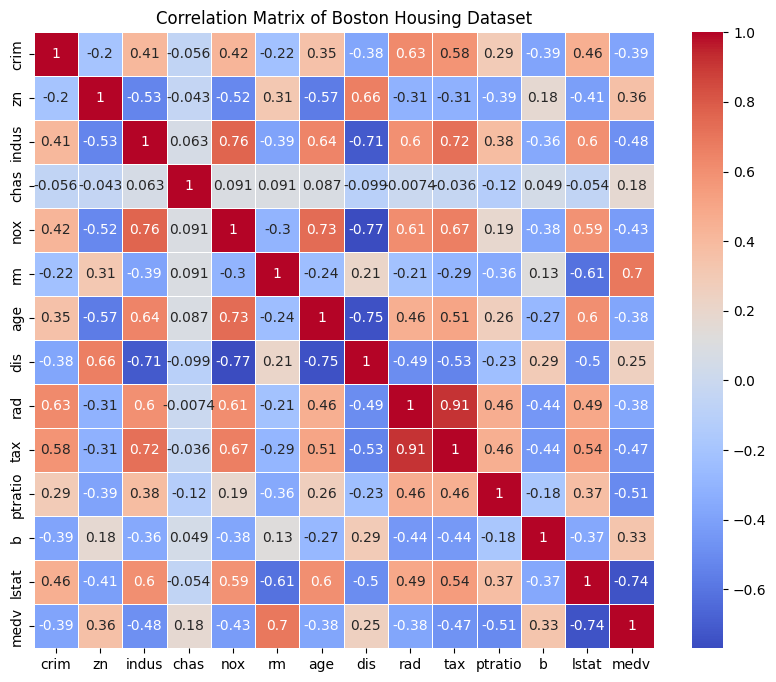

Features strongly correlated with MEDV:
 medv       1.000000
rm         0.695360
zn         0.360445
b          0.333461
dis        0.249929
chas       0.175260
age       -0.376955
rad       -0.381626
crim      -0.388305
nox       -0.427321
tax       -0.468536
indus     -0.483725
ptratio   -0.507787
lstat     -0.737663
Name: medv, dtype: float64


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Matrix of Boston Housing Dataset')
plt.show()


strong_corr = corr_matrix['medv'].sort_values(ascending=False)
print("Features strongly correlated with MEDV:\n", strong_corr)


# Visualization (Scatter Plot)

+ Create scatter plots to visualize the relationship between key features and the target variable.

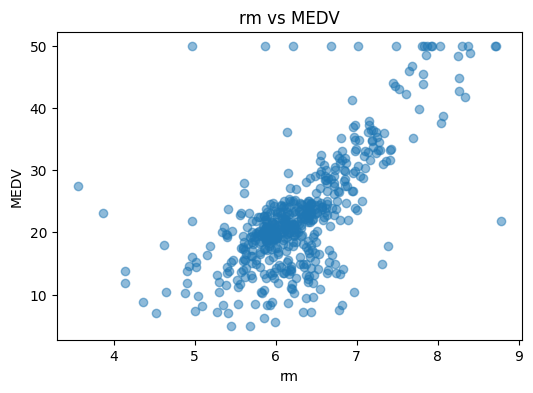

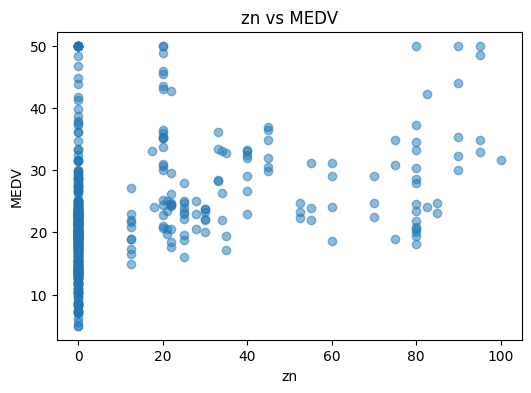

In [10]:
key_features = ['rm', 'zn']  


for feature in key_features:
    plt.figure(figsize=(6, 4))
    plt.scatter(df[feature], df['medv'], alpha=0.5)
    plt.title(f'{feature} vs MEDV')
    plt.xlabel(feature)
    plt.ylabel('MEDV')
    plt.show()


# Split Data (80% Train, 20% Test)

In [11]:
from sklearn.model_selection import train_test_split
# Define features (X) and target variable (Y)
X = df.drop('medv', axis=1)  
Y = df['medv']  

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


print(f"Training set size: {X_train.shape}, Testing set size: {X_test.shape}")

Training set size: (404, 13), Testing set size: (102, 13)


+ Training 

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score




model = LinearRegression()
model.fit(X_train, Y_train)


Y_pred = model.predict(X_test)




In [13]:

mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")



Mean Squared Error (MSE): 24.29111947497345
R-squared (R²): 0.6687594935356329


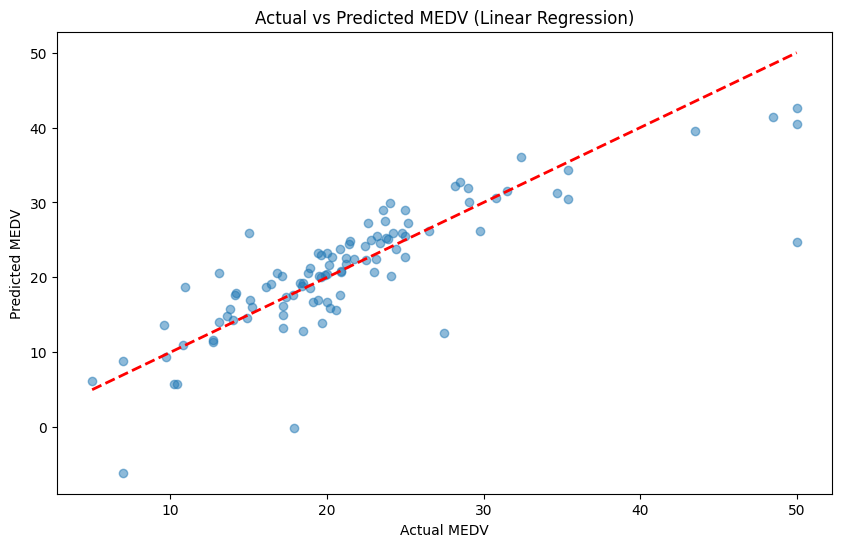

In [14]:

plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs Predicted MEDV (Linear Regression)")
plt.show()